<div class="alert alert-block alert-info">
Visit the <a href="https://github.com/engs1258/biomedical-image-analysis-notebooks/wiki">wiki</a> pages to find some additional documentation and instructions on how view an interactive verson of these notebooks using binder.</div>

---

In [1]:
%matplotlib inline

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt


from skimage import measure
from skimage.color import rgb2gray
from skimage import io
from skimage import filters
from skimage.filters import median, sato, meijering, frangi, hessian
from skimage.morphology import disk
from skimage import feature
from skimage import exposure
from skimage.util import crop 

In [3]:
image = io.imread("../images/retina-image.jpg")
grayscale = rgb2gray(image)

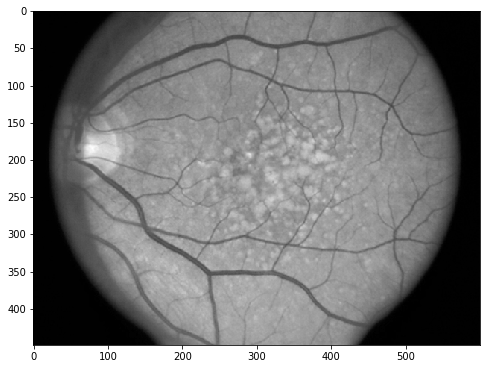

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(grayscale, cmap=plt.cm.gray)

## Apply a median filter for denoising

In [5]:
image_med = median(grayscale, disk(13))

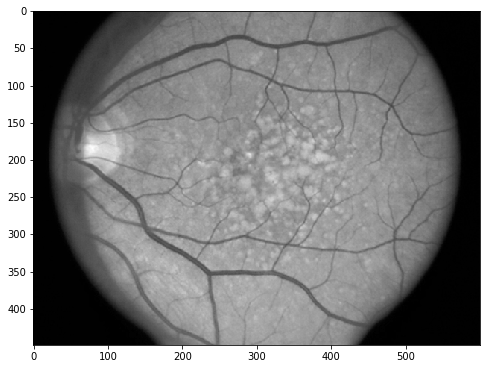

In [6]:
ig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(grayscale, cmap=plt.cm.gray)

## Comparison of vessel detectors

In [7]:
vessels_frangi = frangi(grayscale)
vessels_sato = sato(grayscale)
vessels_meijering = meijering(grayscale)
vessels_hessian = hessian(grayscale, black_ridges=False)

The scaling of the frangi detector is very weak. We use the histogram equalization to scale the image appropriately

In [8]:
vessels_frangi = crop(vessels_frangi, 10)
vessels_frangi = exposure.equalize_hist(vessels_frangi)

Text(0.5, 1.05, 'Hessian')

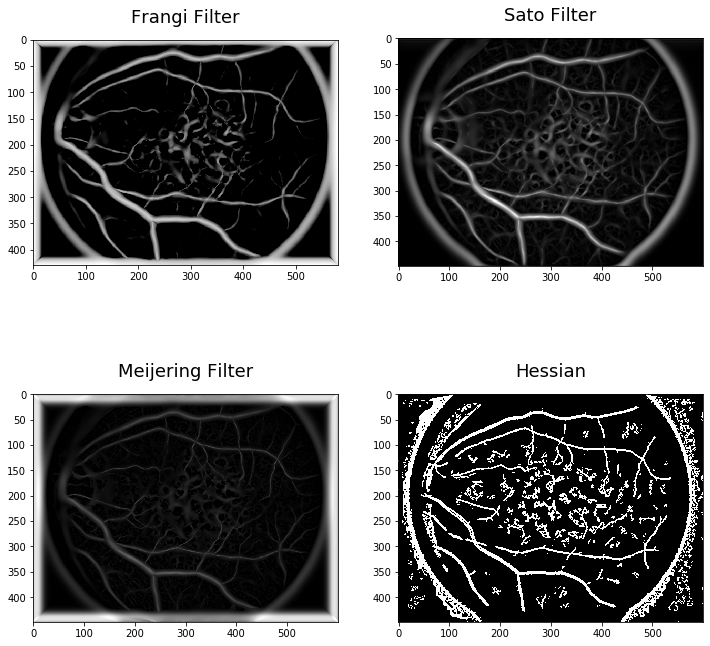

In [9]:
fig, ax = plt.subplots(figsize=(12, 12))
ax = plt.subplot(2,2,1)
plt.imshow(vessels_frangi, cmap='gray')
ax.set_title('Frangi Filter', y=1.05, fontsize=18)

ax = plt.subplot(2,2,2)
plt.imshow(vessels_sato, cmap='gray')
ax.set_title('Sato Filter', y=1.05, fontsize=18)

ax = plt.subplot(2,2,3)
plt.imshow(vessels_meijering, cmap='gray')
ax.set_title('Meijering Filter', y=1.05, fontsize=18)


ax = plt.subplot(2,2,4)
plt.imshow(vessels_hessian, cmap='gray')
ax.set_title('Hessian', y=1.05, fontsize=18)
